## FERRAMENTA DE APOIO NO ACOMPANHAMENTO DE DESMATAMENTO NOS DADOS DO INPE

#### Identificando as coordenadas de Balsas-MA

Biblioteca osmnx para obter a geometria da área urbana de Balsas diretamente do OpenStreetMap

In [1]:
import osmnx as ox

# Obter a geometria de Balsas
gdf_balsas = ox.geocode_to_gdf('Balsas, Maranhão, Brasil')

# Exibir as coordenadas
print(gdf_balsas.geometry.iloc[0])


ModuleNotFoundError: No module named 'osmnx'

Código que separa a Região de Balsas, incluindo Zona Rural e Urbana

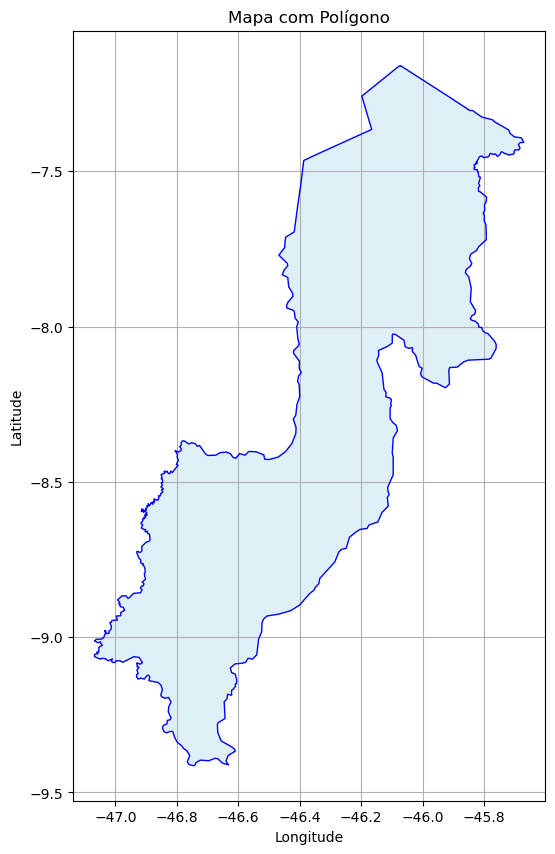

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt

# Coordenadas em formato WKT (Well-Known Text)
wkt_polygon = """POLYGON ((-47.068 -9.063, -47.048 -9.071, -47.045 -9.068, -47.034 -9.069, -47.023 -9.076, -47.01 -9.07, -47.013 -9.078, -47.007 -9.082, -47 -9.081, -46.998 -9.076, -46.985 -9.076, -46.976 -9.081, -46.94 -9.063, -46.923 -9.065, -46.912 -9.082, -46.919 -9.087, -46.929 -9.083, -46.931 -9.085, -46.928 -9.092, -46.93 -9.095, -46.923 -9.097, -46.93 -9.106, -46.926 -9.117, -46.931 -9.12, -46.931 -9.128, -46.926 -9.135, -46.917 -9.132, -46.906 -9.135, -46.898 -9.125, -46.893 -9.122, -46.888 -9.128, -46.891 -9.14, -46.861 -9.146, -46.852 -9.154, -46.847 -9.168, -46.852 -9.186, -46.85 -9.191, -46.839 -9.197, -46.827 -9.194, -46.819 -9.209, -46.826 -9.223, -46.828 -9.24, -46.819 -9.26, -46.822 -9.266, -46.831 -9.268, -46.832 -9.279, -46.844 -9.284, -46.847 -9.292, -46.842 -9.304, -46.835 -9.308, -46.818 -9.303, -46.813 -9.304, -46.808 -9.321, -46.799 -9.338, -46.783 -9.351, -46.779 -9.358, -46.768 -9.365, -46.758 -9.381, -46.766 -9.401, -46.761 -9.41, -46.746 -9.414, -46.741 -9.412, -46.738 -9.404, -46.723 -9.396, -46.696 -9.398, -46.675 -9.39, -46.666 -9.392, -46.651 -9.406, -46.632 -9.411, -46.64 -9.399, -46.633 -9.381, -46.61 -9.367, -46.613 -9.36, -46.622 -9.353, -46.656 -9.334, -46.667 -9.306, -46.668 -9.281, -46.665 -9.275, -46.643 -9.262, -46.646 -9.208, -46.637 -9.199, -46.6347595 -9.1838217, -46.6217595 -9.1868217, -46.622 -9.171, -46.617 -9.168, -46.609 -9.158, -46.61 -9.151, -46.606 -9.15, -46.605 -9.138, -46.61 -9.119, -46.622 -9.114, -46.626 -9.099, -46.61 -9.086, -46.587 -9.084, -46.576 -9.081, -46.568 -9.068, -46.554 -9.071, -46.54 -9.057, -46.534 -9.007, -46.524 -8.983, -46.523 -8.955, -46.518 -8.942, -46.507 -8.932, -46.469 -8.926, -46.43 -8.915, -46.401 -8.897, -46.368 -8.86, -46.353 -8.848, -46.349 -8.839, -46.338 -8.828, -46.335 -8.811, -46.286 -8.758, -46.273 -8.726, -46.264 -8.717, -46.249 -8.714, -46.238 -8.678, -46.218 -8.662, -46.204 -8.653, -46.181 -8.65, -46.175 -8.639, -46.146 -8.629, -46.132 -8.598, -46.112 -8.578, -46.115 -8.55, -46.109 -8.541, -46.113 -8.53, -46.114 -8.518, -46.096 -8.477, -46.096 -8.421, -46.099 -8.407, -46.0975614 -8.3839827, -46.096 -8.359, -46.082 -8.335, -46.086 -8.318, -46.098 -8.308, -46.106 -8.296, -46.106 -8.262, -46.102 -8.254, -46.104 -8.25, -46.102 -8.235, -46.107 -8.23, -46.12 -8.226, -46.119 -8.212, -46.126 -8.202, -46.132 -8.149, -46.148 -8.114, -46.149 -8.107, -46.143 -8.093, -46.144 -8.077, -46.115 -8.064, -46.099 -8.053, -46.099 -8.026, -46.097 -8.024, -46.089 -8.025, -46.061 -8.044, -46.057 -8.065, -46.045 -8.07, -46.033 -8.068, -46.034 -8.08, -46.023 -8.092, -46.02 -8.102, -46.012 -8.128, -46.002 -8.134, -46.007 -8.152, -46.002 -8.162, -45.965 -8.182, -45.955 -8.182, -45.926 -8.197, -45.913 -8.185, -45.915 -8.14, -45.912 -8.132, -45.887 -8.13, -45.867 -8.114, -45.852 -8.108, -45.786 -8.105, -45.778 -8.102, -45.771 -8.089, -45.761 -8.07, -45.761 -8.057, -45.766 -8.047, -45.788 -8.022, -45.794 -8.021, -45.804 -8.014, -45.808 -8.003, -45.817 -8.002, -45.819 -7.992, -45.828 -7.983, -45.841 -7.979, -45.845 -7.975, -45.841 -7.966, -45.83 -7.959, -45.828 -7.948, -45.845 -7.92, -45.842 -7.876, -45.85 -7.84, -45.861 -7.827, -45.859 -7.817, -45.844 -7.804, -45.84 -7.797, -45.848 -7.781, -45.844 -7.767, -45.825 -7.755, -45.818 -7.743, -45.793 -7.72, -45.794 -7.673, -45.8 -7.658, -45.799 -7.643, -45.803 -7.636, -45.798 -7.624, -45.799 -7.608, -45.793 -7.596, -45.792 -7.583, -45.814 -7.565, -45.818 -7.565, -45.819 -7.553, -45.8181023 -7.5517432, -45.8157308 -7.5484231, -45.814 -7.546, -45.818 -7.539, -45.812 -7.519, -45.817 -7.518, -45.8198463 -7.5007406, -45.8202143 -7.5009332, -45.8204417 -7.5006407, -45.8204696 -7.5002311, -45.8211724 -7.4993334, -45.8214063 -7.4982643, -45.8217947 -7.4955455, -45.8221648 -7.4951179, -45.8225188 -7.4949955, -45.8317006 -7.4939127, -45.8323443 -7.4936787, -45.8328293 -7.4928479, -45.8324666 -7.4894195, -45.8326018 -7.48901, -45.8322939 -7.4880877, -45.831766 -7.4876569, -45.8295806 -7.4870293, -45.8294432 -7.4865304, -45.8312618 -7.4848763, -45.8319892 -7.4840178, -45.8319441 -7.4821935, -45.8323068 -7.4807021, -45.8321984 -7.4783395, -45.8315439 -7.4780162, -45.8265422 -7.477446, -45.8263716 -7.4765726, -45.8267975 -7.4730207, -45.8258239 -7.4715905, -45.8250498 -7.4715267, -45.824523 -7.4717575, -45.8233997 -7.4724463, -45.8228552 -7.4731032, -45.8225516 -7.4731585, -45.8221669 -7.4729665, -45.8217249 -7.4718862, -45.8224046 -7.4715655, -45.8230371 -7.4707533, -45.8236969 -7.4704634, -45.8241174 -7.4698805, -45.8240745 -7.4689997, -45.8235317 -7.4684699, -45.8227613 -7.4681976, -45.8229265 -7.4664338, -45.8225425 -7.4653977, -45.8211134 -7.464102, -45.8196285 -7.4621552, -45.8193485 -7.4604851, -45.8184786 -7.4588764, -45.8154507 -7.4532767, -45.814698 -7.4529191, -45.8120024 -7.4516384, -45.8089361 -7.4511256, -45.8058462 -7.4513299, -45.8043936 -7.4523703, -45.8041382 -7.4535703, -45.8029216 -7.4550384, -45.8012414 -7.4557235, -45.7966259 -7.4556256, -45.7945059 -7.4545724, -45.7932785 -7.4542533, -45.7909053 -7.4541043, -45.7879591 -7.4534512, -45.7870429 -7.4525129, -45.7843843 -7.4512086, -45.7835646 -7.4503533, -45.7824874 -7.4474299, -45.781554 -7.4445405, -45.7807858 -7.4434256, -45.7803357 -7.4432635, -45.7795649 -7.4426511, -45.7779534 -7.4424852, -45.7758742 -7.4431575, -45.7727993 -7.4448703, -45.7710226 -7.4452129, -45.7691558 -7.4452107, -45.7668984 -7.4448895, -45.7653256 -7.4442831, -45.7637034 -7.4442469, -45.7623279 -7.4448682, -45.7612636 -7.4459405, -45.760768 -7.4475405, -45.760077 -7.4488278, -45.758554 -7.4503141, -45.7564893 -7.4515788, -45.7553241 -7.4514448, -45.7503932 -7.4471363, -45.7481616 -7.4446682, -45.7465737 -7.4414298, -45.7449816 -7.4384553, -45.7437306 -7.437417, -45.7433226 -7.4374, -45.7427585 -7.4373766, -45.7401085 -7.4382319, -45.737819 -7.4392596, -45.7348836 -7.441649, -45.7332031 -7.4426453, -45.7318151 -7.4434682, -45.7266335 -7.4440881, -45.7256439 -7.4442065, -45.7236634 -7.4449235, -45.7222896 -7.446008, -45.7205477 -7.4473831, -45.7192924 -7.4478874, -45.716842 -7.4474788, -45.7156296 -7.4464193, -45.7134516 -7.4457767, -45.7066303 -7.4454363, -45.7035296 -7.4429192, -45.7024095 -7.4409618, -45.7019739 -7.4392149, -45.702461 -7.4374808, -45.7023237 -7.4367645, -45.7018538 -7.4343126, -45.7013002 -7.4330807, -45.7006963 -7.4325549, -45.6988025 -7.4309061, -45.6978077 -7.4308241, -45.6970778 -7.430764, -45.6967619 -7.430738, -45.6929317 -7.4311402, -45.6918592 -7.4311292, -45.6881595 -7.4310913, -45.6863678 -7.4297763, -45.6840933 -7.4262272, -45.6835311 -7.4242824, -45.6838358 -7.4227972, -45.6876531 -7.4171288, -45.6882174 -7.4151244, -45.687 -7.412, -45.683986 -7.408743, -45.6814497 -7.4073535, -45.6803189 -7.4071577, -45.6769715 -7.4072216, -45.6741798 -7.4069662, -45.6709483 -7.4059831, -45.679 -7.392, -45.702 -7.389, -45.715 -7.378, -45.721 -7.366, -45.764 -7.342, -45.773 -7.334, -45.808 -7.325, -45.838 -7.304, -45.847 -7.304, -45.8703914 -7.2886043, -45.916 -7.259, -45.9918183 -7.2107979, -46.0676371 -7.1625903, -46.0715132 -7.1599018, -46.0728435 -7.1613629, -46.077 -7.161, -46.177 -7.241, -46.198 -7.258, -46.166 -7.365, -46.333 -7.44, -46.387 -7.465, -46.397 -7.545, -46.406 -7.605, -46.418 -7.695, -46.446 -7.712, -46.448 -7.728, -46.449 -7.745, -46.468 -7.77, -46.441 -7.796, -46.439 -7.804, -46.451 -7.818, -46.457 -7.833, -46.446 -7.838, -46.439 -7.842, -46.436 -7.872, -46.424 -7.891, -46.422 -7.902, -46.439 -7.922, -46.443 -7.932, -46.442 -7.94, -46.422 -7.947, -46.418 -7.951, -46.415 -7.973, -46.405 -7.985, -46.41 -8.001, -46.406 -8.041, -46.402 -8.055, -46.404 -8.062, -46.42 -8.077, -46.42 -8.086, -46.401 -8.112, -46.402 -8.134, -46.395 -8.148, -46.404 -8.159, -46.407 -8.176, -46.402 -8.187, -46.4 -8.225, -46.409 -8.25, -46.413 -8.285, -46.421 -8.298, -46.412 -8.325, -46.413 -8.345, -46.426 -8.377, -46.446 -8.402, -46.47 -8.42, -46.5 -8.428, -46.514 -8.427, -46.517 -8.413, -46.542 -8.403, -46.566 -8.402, -46.578 -8.414, -46.596 -8.409, -46.608 -8.424, -46.617 -8.421, -46.626 -8.409, -46.638 -8.404, -46.66 -8.406, -46.673 -8.414, -46.699 -8.415, -46.706 -8.411, -46.726 -8.383, -46.734 -8.385, -46.74 -8.377, -46.752 -8.374, -46.761 -8.378, -46.776 -8.368, -46.782 -8.368, -46.786 -8.374, -46.786 -8.382, -46.791 -8.386, -46.785 -8.395, -46.787 -8.399, -46.795 -8.404, -46.806 -8.399, -46.798 -8.412, -46.799 -8.422, -46.795 -8.43, -46.802 -8.444, -46.796 -8.446, -46.815 -8.47, -46.82 -8.465, -46.823 -8.474, -46.828 -8.472, -46.832 -8.465, -46.835 -8.469, -46.841 -8.465, -46.841 -8.473, -46.851 -8.476, -46.848 -8.488, -46.851 -8.489, -46.847 -8.493, -46.846 -8.501, -46.851 -8.503, -46.847 -8.511, -46.852 -8.516, -46.8440057 -8.5223108, -46.8457454 -8.5242871, -46.85 -8.525, -46.846 -8.532, -46.846 -8.533, -46.852 -8.537, -46.854 -8.545, -46.8557038 -8.545, -46.86 -8.545, -46.858 -8.551, -46.862 -8.559, -46.875 -8.555, -46.872 -8.562, -46.876 -8.563, -46.874 -8.567, -46.878 -8.565, -46.878 -8.572, -46.883 -8.566, -46.889 -8.577, -46.893 -8.57, -46.893 -8.578, -46.897 -8.576, -46.897 -8.583, -46.902 -8.586, -46.899 -8.588, -46.9 -8.592, -46.906 -8.592, -46.914 -8.587, -46.912 -8.591, -46.916 -8.595, -46.91 -8.595, -46.909 -8.598, -46.906 -8.595, -46.901 -8.597, -46.897 -8.601, -46.903 -8.604, -46.897 -8.606, -46.905 -8.608, -46.901 -8.613, -46.905 -8.616, -46.907 -8.614, -46.907 -8.619, -46.911 -8.619, -46.911 -8.626, -46.917 -8.633, -46.911 -8.639, -46.916 -8.648, -46.906 -8.654, -46.902 -8.653, -46.903 -8.661, -46.895 -8.659, -46.896 -8.665, -46.889 -8.669, -46.887 -8.686, -46.89 -8.691, -46.9 -8.694, -46.914 -8.708, -46.914 -8.722, -46.917 -8.726, -46.922 -8.727, -46.928 -8.723, -46.931 -8.726, -46.924 -8.744, -46.918 -8.751, -46.917 -8.762, -46.909 -8.764, -46.911 -8.768, -46.907 -8.771, -46.904 -8.778, -46.903 -8.792, -46.906 -8.796, -46.902 -8.814, -46.913 -8.822, -46.907 -8.828, -46.909 -8.835, -46.914 -8.835, -46.918 -8.839, -46.918 -8.843, -46.913 -8.847, -46.918 -8.857, -46.941 -8.859, -46.956 -8.874, -46.959 -8.875, -46.965 -8.867, -46.978 -8.867, -46.993 -8.88, -46.986 -8.888, -46.989 -8.892, -46.984 -8.894, -46.986 -8.898, -46.982 -8.903, -46.975 -8.903, -46.97 -8.914, -46.982 -8.92, -46.983 -8.931, -46.997 -8.932, -46.994 -8.945, -47.011 -8.946, -47.013 -8.952, -47.018 -8.953, -47.013 -8.966, -47.015 -8.976, -47.021 -8.98, -47.021 -8.988, -47.031 -8.988, -47.031 -8.98, -47.035 -8.979, -47.032 -8.986, -47.038 -9.001, -47.044 -9.006, -47.062 -9.007, -47.068 -9.012, -47.056 -9.018, -47.048 -9.015, -47.048 -9.021, -47.044 -9.023, -47.043 -9.026, -47.054 -9.033, -47.054 -9.048, -47.061 -9.048, -47.057 -9.053, -47.068 -9.056, -47.068 -9.063))"""


# Criando objeto de geometria
polygon = wkt.loads(wkt_polygon)

# Criando GeoDataFrame
gdf = gpd.GeoDataFrame(index=[0], crs="EPSG:4326", geometry=[polygon])

# Plotando o polígono
fig, ax = plt.subplots(figsize=(10, 10))
gdf.boundary.plot(ax=ax, edgecolor='blue', linewidth=1)
gdf.plot(ax=ax, color='lightblue', alpha=0.4)
ax.set_title("Mapa com Polígono")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

Mostrar de acordo com os dados do IBGE, as regiões mais densas de Balsas

C:\Users\joemi\AppData\Local\Temp\ipykernel_11352\3643259359.py:26: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


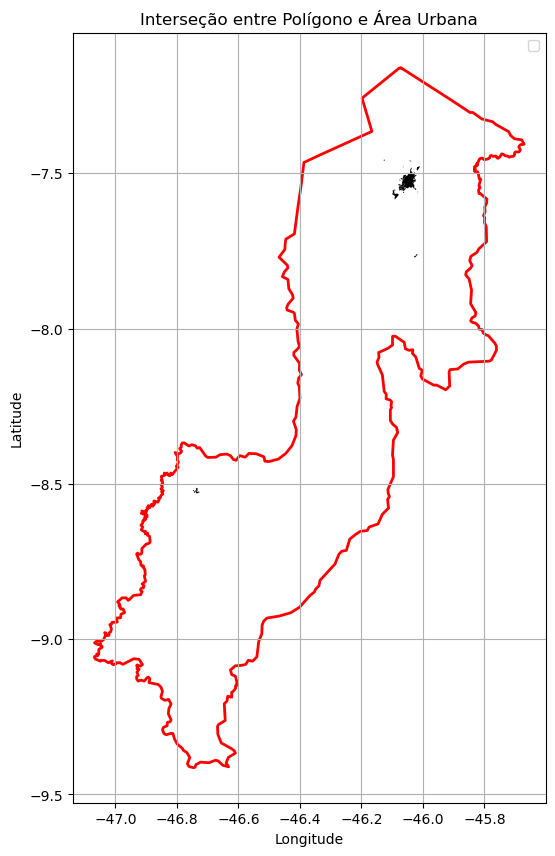

In [ ]:
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

# 1. Carrega shapefile da área urbana
area_urbana = gpd.read_file("AreasUrbanizadas2019_Brasil/AU_2022_AreasUrbanizadas2019_Brasil.shp")

# 2. Cria o polígono a partir das coordenadas
gdf_poligono = gpd.GeoDataFrame(geometry=[polygon], crs="EPSG:4326")

# 3. Garantir que ambos estão no mesmo sistema de coordenadas
if area_urbana.crs != gdf_poligono.crs:
    area_urbana = area_urbana.to_crs(gdf_poligono.crs)

# 4. Interseção: área urbana DENTRO do polígono
intersecao = gpd.overlay(area_urbana, gdf_poligono, how='intersection')

# 5. Plotagem
fig, ax = plt.subplots(figsize=(10, 10))
gdf_poligono.plot(ax=ax, color='none', edgecolor='red', linewidth=2, label='Polígono alvo')
intersecao.plot(ax=ax, color='black', label='Área urbana dentro do polígono')

plt.title("Interseção entre Polígono e Área Urbana")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Converta para UTM adequado (exemplo: zona 22S -> EPSG: 32722)
intersecao_utm = intersecao.to_crs(epsg=32722)
area_m2 = intersecao_utm.geometry.area.sum()
area_ha = area_m2 / 10_000

print(f"Área urbana dentro do polígono: {area_ha:.2f} hectares")

Área urbana dentro do polígono: 3250.02 hectares


Obtém as coordenadas da área urbana mais densa da Região de Balsas

C:\Users\joemi\AppData\Local\Temp\ipykernel_11352\732531760.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersecao['area'] = intersecao.geometry.area
C:\Users\joemi\AppData\Local\Temp\ipykernel_11352\732531760.py:37: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Coordenadas da região urbana mais densa dentro do polígono:
(-46.064673532357574, -7.554946289339739)
(-46.064333784676364, -7.5508057818613)
(-46.0644753658454, -7.55059469658795)
(-46.06772379351821, -7.551951196190714)
(-46.06811529898181, -7.548121982743282)
(-46.06849328133984, -7.544425033488437)
(-46.06867312866194, -7.542665997337849)
(-46.06318080435062, -7.542054626519757)
(-46.06355304543666, -7.538375394808554)
(-46.05961312274735, -7.537828049424888)
(-46.06067103573969, -7.534777731606994)
(-46.05994812830346, -7.534195879236393)
(-46.06307634899429, -7.530587626517729)
(-46.06675403926744, -7.534883523355859)
(-46.06862630905687, -7.534768306711953)
(-46.067504953390824, -7.527993941267312)
(-46.06675333329963, -7.524647996507781)
(-46.06489730886369, -7.519823535727539)
(-46.06324561579248, -7.519852034343842)
(-46.06271497171855, -7.518441843416269)
(-46.06182780041263, -7.5161958396662385)
(-46.060367897660285, -7.516734880710146)
(-46.05771769361661, -7.5097448515436

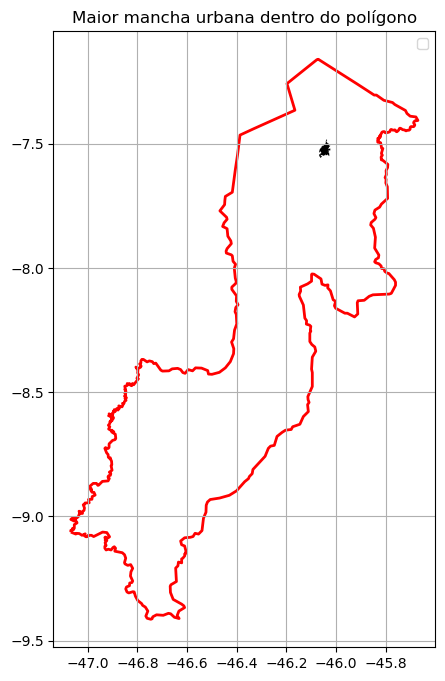

In [ ]:
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

# 1. Carrega shapefile da área urbana
area_urbana = gpd.read_file("AreasUrbanizadas2019_Brasil/AU_2022_AreasUrbanizadas2019_Brasil.shp")

# 2. Define o polígono da sua área-alvo
gdf_poligono = gpd.GeoDataFrame(geometry=[polygon], crs="EPSG:4326")

# 3. Garantir que ambos estão na mesma projeção
if area_urbana.crs != gdf_poligono.crs:
    area_urbana = area_urbana.to_crs(gdf_poligono.crs)

# 4. Interseção: áreas urbanas dentro do polígono
intersecao = gpd.overlay(area_urbana, gdf_poligono, how='intersection')

# 5. Ordenar pelas maiores áreas (opcional)
intersecao['area'] = intersecao.geometry.area
intersecao = intersecao.sort_values(by='area', ascending=False)

# 6. Pegar só a maior mancha urbana (ou top N)
maior_mancha = intersecao.iloc[0]  # ou .head(N) se quiser várias

# 7. Extrair coordenadas da borda do polígono
coords_extraidas = list(maior_mancha.geometry.exterior.coords)

# 8. Exibir resultado
print("Coordenadas da região urbana mais densa dentro do polígono:")
for coord in coords_extraidas:
    print(coord)

# 9. Plotar apenas o resultado
fig, ax = plt.subplots(figsize=(8, 8))
gdf_poligono.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=2, label='Polígono')
gpd.GeoSeries(maior_mancha.geometry).plot(ax=ax, color='black', label='Área urbana densa')
plt.legend()
plt.title("Maior mancha urbana dentro do polígono")
plt.grid(True)
plt.show()

Aprensenta a área mais densa no mapa, lembrando que são dados de 2019

In [ ]:
import geemap
import ee
from shapely.geometry import Polygon

# Autenticar e inicializar Earth Engine (só precisa na primeira execução local)
try:
    ee.Initialize()
except Exception as e:
    ee.Authenticate()
    ee.Initialize()

# Coordenadas do seu polígono (ajuste conforme necessário)
coords = [(-46.064673532357574, -7.554946289339739),(-46.064333784676364, -7.5508057818613),(-46.0644753658454, -7.55059469658795),(-46.06772379351821, -7.551951196190714),(-46.06811529898181, -7.548121982743282),(-46.06849328133984, -7.544425033488437),(-46.06867312866194, -7.542665997337849),(-46.06318080435062, -7.542054626519757),(-46.06355304543666, -7.538375394808554),(-46.05961312274735, -7.537828049424888),(-46.06067103573969, -7.534777731606994),(-46.05994812830346, -7.534195879236393),(-46.06307634899429, -7.530587626517729),(-46.06675403926744, -7.534883523355859),(-46.06862630905687, -7.534768306711953),(-46.067504953390824, -7.527993941267312),(-46.06675333329963, -7.524647996507781),(-46.06489730886369, -7.519823535727539),(-46.06324561579248, -7.519852034343842),(-46.06271497171855, -7.518441843416269),(-46.06182780041263, -7.5161958396662385),(-46.060367897660285, -7.516734880710146),(-46.05771769361661, -7.509744851543644),(-46.05609654961603, -7.510228292901331),(-46.05490518262803, -7.507383496251293),(-46.05204022407702, -7.508757465184829),(-46.04797597101418, -7.50356017066531),(-46.04910299960369, -7.502676000397059),(-46.04459263424263, -7.500251413771707),(-46.04150412041878, -7.497864989877314),(-46.041858776161575, -7.496205389067427),(-46.04163740714057, -7.489080271837054),(-46.04033685885889, -7.485459162410393),(-46.03968830197351, -7.485251126738035),(-46.03779306080105, -7.481527799468324),(-46.03695229990865, -7.481739940545765),(-46.0368069649694, -7.482763414899637),(-46.03742059038791, -7.483191752097639),(-46.03627731194837, -7.4855186291813425),(-46.039909481237544, -7.490032393979732),(-46.037247989802836, -7.493867750696097),(-46.03643862334377, -7.494037883541466),(-46.03546784566453, -7.497233103724739),(-46.03470183192394, -7.496936397596642),(-46.03410617765792, -7.498488336967114),(-46.03179703250703, -7.497609738898291),(-46.029436136768254, -7.50343263330933),(-46.02975351111559, -7.504468506616263),(-46.0280432173206, -7.505367733334197),(-46.028625069691145, -7.506681309195017),(-46.02268349174972, -7.508715979458827),(-46.02309155822877, -7.509166135109012),(-46.02428762417446, -7.509043983792765),(-46.02535435322079, -7.510639669784894),(-46.02624373326165, -7.5104169526802025),(-46.02724978235153, -7.513306493299979),(-46.028404671038686, -7.512429307166769),(-46.02964208781208, -7.516810696256584),(-46.03011521214728, -7.517907787314471),(-46.03119057828252, -7.518045236998034),(-46.03108630908588, -7.52092102338645),(-46.03055741958917, -7.521314419225007),(-46.029534269890576, -7.52163947648063),(-46.02901297157132, -7.520431590745261),(-46.028062621093056, -7.521230685147941),(-46.027434119089264, -7.519632322773418),(-46.026456612682466, -7.519972713469883),(-46.02610582852111, -7.519186312997874),(-46.02482539717431, -7.518812052034548),(-46.02315158168011, -7.520245439175653),(-46.023828567934004, -7.522010782271764),(-46.021986889483344, -7.522629965500471),(-46.02211380990434, -7.523742256899595),(-46.02460846271032, -7.523195100373528),(-46.02497402363224, -7.524293114135844),(-46.022700273099076, -7.525219774672792),(-46.02286329680368, -7.5256659445276455),(-46.02327514583129, -7.525502920823101),(-46.02368858396096, -7.526665745128014),(-46.02614403801692, -7.525737275155052),(-46.02671054525541, -7.526724064364032),(-46.027728265746816, -7.526421001827714),(-46.02778853201511, -7.526759799824845),(-46.02847474261523, -7.526549704705076),(-46.02910967657027, -7.525931930713966),(-46.02947004480666, -7.524996689745365),(-46.02975319095697, -7.524739283990698),(-46.03007065883378, -7.52483366604082),(-46.03008781879777, -7.525451440031873),(-46.02954726689279, -7.52641242139606),(-46.029538686461194, -7.527347662364662),(-46.03001917714329, -7.527896794701292),(-46.03059404987545, -7.527922535096877),(-46.03129333571883, -7.5278238632806165),(-46.031786696598715, -7.528059818405836),(-46.03206338112011, -7.52872530143145),(-46.03255033433044, -7.52887493692873),(-46.033313971162784, -7.529020799770024),(-46.03392316472224, -7.528806295274251),(-46.034600999936174, -7.5286175311740635),(-46.034549519144946, -7.529158083079039),(-46.03412050925408, -7.52949271091984),(-46.03349761092596, -7.529377124654559),(-46.033108046199345, -7.529741536242852),(-46.03230866401361, -7.52929461995069),(-46.031482099819016, -7.528651852001303),(-46.03089414374972, -7.528521879281243),(-46.03008781879777, -7.528557469051918),(-46.029738694784896, -7.5282285887782905),(-46.02889946184064, -7.528252872272219),(-46.02852647611593, -7.5272937291222775),(-46.02782828294886, -7.5273086021102245),(-46.02740650900313, -7.527489235439816),(-46.02734644688098, -7.527866763640191),(-46.02823020705836, -7.528656141767499),(-46.02928700938793, -7.5301199304903434),(-46.029422853781625, -7.530758289063726),(-46.03124577777038, -7.532877997421622),(-46.03185962891871, -7.533135002078609),(-46.03149926068227, -7.533495370315052),(-46.03101877000017, -7.534482092074825),(-46.030283996908906, -7.534933676747755),(-46.029457174608865, -7.535537456388454),(-46.02904686432129, -7.5363359833189065),(-46.02820349899224, -7.536104310765268),(-46.02818931488491, -7.539311493730395),(-46.02771596841717, -7.540211853594144),(-46.02880507979057, -7.5415435912636894),(-46.02720058403969, -7.54184389737793),(-46.0270118199395, -7.542298647664438),(-46.027844098426385, -7.54301938413721),(-46.02749662826676, -7.543774405464376),(-46.0281186650443, -7.545267394274788),(-46.028513353208666, -7.545807947079027),(-46.028384650331304, -7.546889050888922),(-46.0278269384624, -7.547395281966658),(-46.02716626321245, -7.547052074593523),(-46.02668556118965, -7.549431590795223),(-46.027119174710094, -7.54977116490727),(-46.027826559847824, -7.548767238217408),(-46.02925981838587, -7.549431590795223),(-46.03119932598804, -7.546383925977352),(-46.03518016333385, -7.542066982305357),(-46.03586742883874, -7.545343494906319),(-46.03651867289841, -7.5458851682658405),(-46.03955398912524, -7.545635904972983),(-46.04144370396375, -7.546511522688547),(-46.04226386768329, -7.5461458538480315),(-46.04191951727188, -7.544127043128469),(-46.04378849824053, -7.543069129236869),(-46.04472991755159, -7.544546658701279),(-46.04428219097031, -7.545326012085752),(-46.0467056129736, -7.546415424732004),(-46.04698411952148, -7.545488492599816),(-46.04809697209754, -7.547814838184195),(-46.04838507980753, -7.547232258262056),(-46.049419420669665, -7.547626367262978),(-46.04927741951724, -7.548158919698324),(-46.050624509513455, -7.548347683798511),(-46.052349128609364, -7.547867193116417),(-46.05529213482413, -7.546348498984003),(-46.056235956224384, -7.545833687474669),(-46.0569223709706, -7.54576504582019),(-46.05688805014336, -7.5446667811469865),(-46.06264635434576, -7.546687942694348),(-46.06236221354527, -7.5478414527208315),(-46.06158999628127, -7.548407745021393),(-46.060018655836245, -7.54869370335166),(-46.058980765349986, -7.549919743701139),(-46.05859655248884, -7.549524825310414),(-46.05747084770144, -7.5505097888955675),(-46.05701241828842, -7.550827162343637),(-46.062469558423345, -7.556968121781324),(-46.06469602620058, -7.555220417987869),(-46.064673532357574, -7.554946289339739)]

# Cria geometria no formato GEE
aoi = ee.Geometry.Polygon([coords])

# Filtra a coleção Sentinel-2 por data e cobertura de nuvem
sentinel = (ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")
            .filterBounds(aoi)
            .filterDate('2024-01-01', '2024-12-31')
            .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10))
            .median()
            .clip(aoi))

# Define bandas RGB
rgb_vis_params = {
    'bands': ['B4', 'B3', 'B2'],  # RGB natural
    'min': 0,
    'max': 3000
}

# Exporta a imagem para arquivo (opcional) ou visualiza no mapa
Map = geemap.Map()
Map.centerObject(aoi, 15)
Map.addLayer(sentinel, rgb_vis_params, "Sentinel-2 RGB")
Map.addLayer(aoi, {}, "Área de interesse")
Map

Enter verification code: 4/1AUJR-x6sIN4F3PIfKp5j4AMs6qCryxK3BPu1bPiDiTgP7NwPw3-loEIhJqw

Successfully saved authorization token.


Map(center=[-7.524615473423757, -46.04543599751709], controls=(WidgetControl(options=['position', 'transparent…

In [ ]:
# Gera uma visualização do mapa em HTML
Map.to_html('mapa_sentinel.html')

## O restante do código que apresenta os resultados finais esperados, está na mesma pasta, porém precisa abrir com o VS Code, pois usa o STREAMLIT e precisa rodar no terminal.

- Abaixo está um código para subdividir a área em polígonos irregulares de forma que abrange toda a área, sem precisar passar do limite e sem ficar faltando alguma parte da região urbanizada da cidade. O primeiro modelo 'app.py' subdividi em quadrados, aí serve, mas nem tanto.

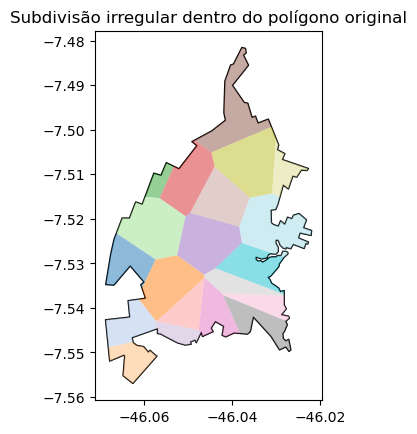

In [ ]:
import geopandas as gpd
import numpy as np
from shapely.geometry import Point, Polygon, MultiPolygon
from shapely.ops import voronoi_diagram, unary_union, polygonize
import matplotlib.pyplot as plt

# Lê o polígono original (irregular)
gdf = gpd.read_file("area.geojson")
polygon = gdf.geometry[0]

# Gera N pontos dentro do polígono (você pode mudar a quantidade)
num_points = 20
points = []
minx, miny, maxx, maxy = polygon.bounds

while len(points) < num_points:
    pnt = Point(np.random.uniform(minx, maxx), np.random.uniform(miny, maxy))
    if polygon.contains(pnt):
        points.append(pnt)

# Gera Voronoi
multipoint = unary_union(points)
v_diagram = voronoi_diagram(multipoint, envelope=polygon.envelope)

# Intersecciona cada célula com o polígono original para manter os limites
subpolygons = []
for region in v_diagram.geoms:
    clipped = region.intersection(polygon)
    if clipped.is_valid and not clipped.is_empty:
        subpolygons.append(clipped)

# Cria um GeoDataFrame com os subpolígonos
sub_gdf = gpd.GeoDataFrame(geometry=subpolygons, crs=gdf.crs)

# Salva se quiser usar no Earth Engine depois
sub_gdf.to_file("subdivisoes.geojson", driver="GeoJSON")

# Visualiza
gdf.plot(facecolor='none', edgecolor='black')
sub_gdf.plot(ax=plt.gca(), alpha=0.5, cmap='tab20')
plt.title("Subdivisão irregular dentro do polígono original")
plt.show()


### Links para consulta

GDAL -> <https://gdal.org/en/stable/>  
GEOJSON -> <https://geojson.io/#map=11.71/-7.5329/-46.0374>  
Vídeo Aula sobre o Google Earth Engine Python API -> <https://www.youtube.com/watch?v=Lqirs04EccA&ab_channel=SpatialeLearning> Link sobre a Análise de Desmatamento feita pelo Rian Bispo no GitHub -> <https://github.com/RianGBispo/Deteccao_de_Desmatamento/blob/main/An%C3%A1lise_de_Desmatamento_com_Landsat8.ipynb>   
Site do IBGE com os dados das cidades, em destaque está Balsas -> <https://cidades.ibge.gov.br/brasil/ma/balsas/panorama>  
Site do IBGE com as áreas urbanizadas no Brasil do ano de 2019 -> <https://www.ibge.gov.br/en/geosciences/maps/brazil-geographic-networks-mapasdobrasil/18097-urbanized-areas.html?=&t=acesso-ao-produto>  




